In [ ]:

from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(512, 512)


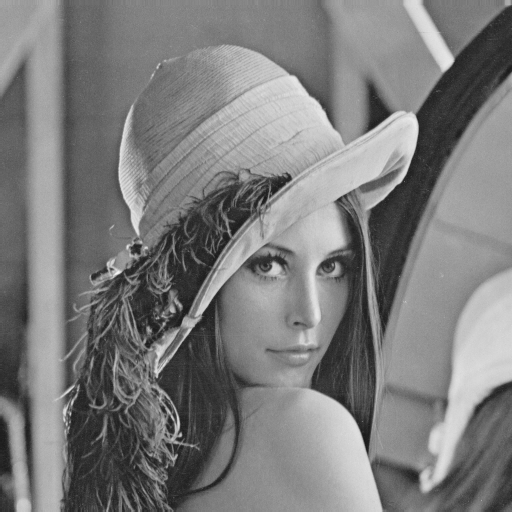

In [ ]:

img1 = cv2.imread('/content/gdrive/MyDrive/Images/lena.jpg')
RGB_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
cv2_imshow(gimg1)
#plt.imshow(gimg1, cmap='gray')

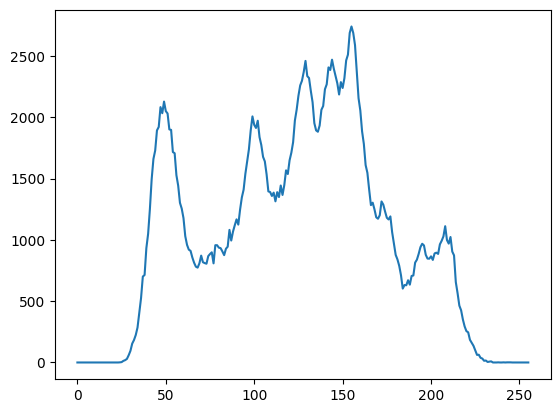

In [ ]:

hist = cv2.calcHist([gimg1], [0], None, [256], [0, 255])
plt.plot(hist)


(256, 256)


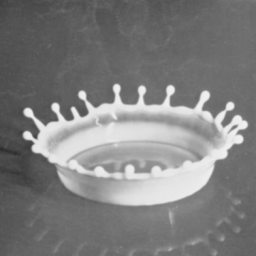

In [ ]:

#img1 = cv2.imread('/content/gdrive/MyDrive/Images/rice.bmp')
#img1 = cv2.imread('/content/gdrive/MyDrive/Images/cell.bmp')
#img1 = cv2.imread('/content/gdrive/MyDrive/Images/cell-bright.bmp')
img1 = cv2.imread('/content/gdrive/MyDrive/Images/milkdrop1.bmp')
RGB_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
cv2_imshow(gimg1)
#plt.imshow(gimg1, cmap='gray')

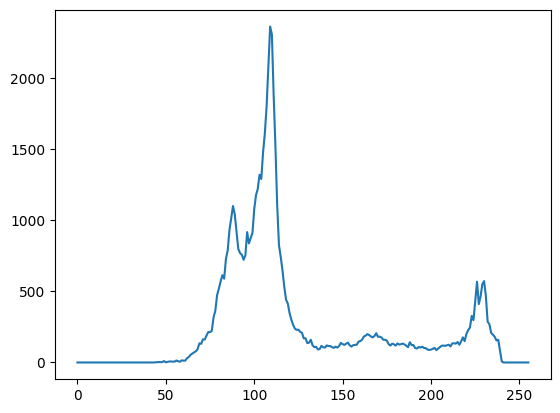

In [ ]:
hist = cv2.calcHist([gimg1], [0], None, [256], [0, 255])
plt.plot(hist)

In [ ]:
gBin = np.zeros((gimg1.shape[0], gimg1.shape[1]))


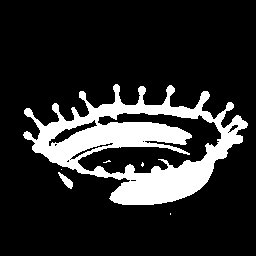

In [ ]:
T = 180

for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if (gimg1[h, w] > T):
      gBin[h, w] = 255
    else:
      gBin[h, w] = 0

#plt.imshow(gBin, cmap = 'gray')
cv2_imshow(gBin)

In [ ]:
T1 = 50
T2 = 0
T0 = 1
outimg = np.zeros((gimg1.shape[0], gimg1.shape[1]))

In [ ]:
def threshold_update(img, output, T1):
  sum1 = 0
  count1 = 1
  sum2 = 0
  count2 = 1

  for h in range(img.shape[0]):
    for w in range(img.shape[1]):
      if (output[h, w] == 255):
        sum1 = sum1 + img[h, w]
        count1 = count1 + 1
      else:
        sum2 = sum2 + img[h, w]
        count2 = count2 + 1

  avg1 = sum1 / count1
  ava2 = sum2 / count2

  T2 = np.int32(avg1 + ava2) / 2
  return T2


In [ ]:
for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    if (gimg1[h, w] > T1):
      outimg[h, w] = 255
    else:
      outimg[h, w] = 0

In [ ]:
while True:
  T2 = threshold_update(gimg1, outimg, T1)

  if(np.abs(T2 - T1) < T0):
    for h in range(gimg1.shape[0]):
     for w in range(gimg1.shape[1]):
      if(gimg1[h, w] > T2):
        outimg[h, w] = 255
      else:
        outimg[h, w] = 0
  break;
else:
  T1 = T2
  for h in range(gimg1.shape[0]):
    for w in range(gimg1.shape[1]):
      if(gimg1[h, w] > T2):
        outimg[h, w] = 255
    else:
      outimg[h, w] = 0

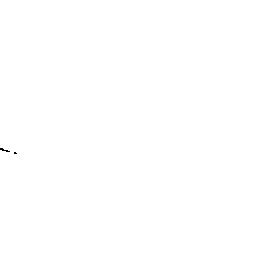

85.5


In [ ]:
cv2_imshow(outimg)
print(T2)